This Machine Learning Project aims to work on the procedure of SMS Spam Detection.
It is no secret that in the current digital age, SMS Spamming is very rampant and causes unceasing financial harms to individuals.
Thus, it is only fitting that such an issue be tackled with utmost urgency.

This Project has been done by Arghya Bhattacharya as a part of the Machine Learning Internship at CodSoft.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

The csv file is being read. A ',' delimeter has been used with respect to the pre-defined dataset.

In [ ]:
df = pd.read_csv("spam.csv",delimiter=',',encoding='latin-1')

The various trends and insights that the dataset may contain are being researched thoroughly.

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.shape

(5572, 5)

The dataset is being checked for null values so that data cleaning becomes an easier task.

In [ ]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
df['v1'].value_counts()/len(df)*100

ham     86.593683
spam    13.406317
Name: v1, dtype: float64

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


The unwanted columns of data are being dropped.

In [ ]:
df=df.drop(['Unnamed: 2'], axis=1)

In [ ]:
df=df.drop(['Unnamed: 3'], axis=1)

In [ ]:
df=df.drop(['Unnamed: 4'], axis=1)


In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


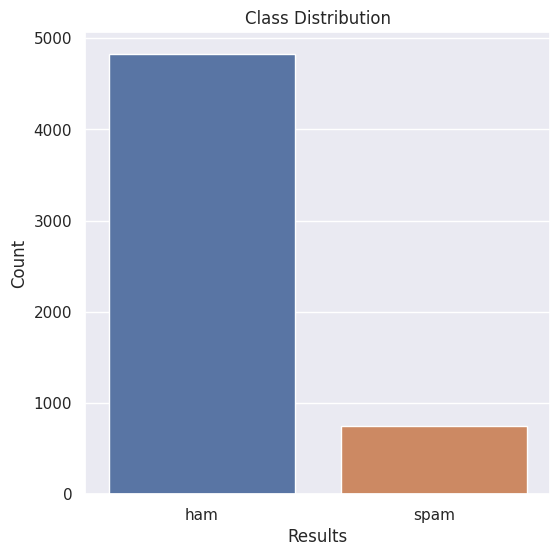

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='v1', data=df)
plt.title('Class Distribution')
plt.xlabel('Results')
plt.ylabel('Count')
plt.show()

The graph above makes it evident that the data set is quite balanced.

In [ ]:
ham = df[df['v1']=='ham']
spam = df[df['v1']=='spam']

In [ ]:
print(ham.shape)

(4825, 2)


In [ ]:
print(spam.shape)

(747, 2)


In [ ]:
df1= ham.append(spam, ignore_index=True)


<ipython-input-32-d25e29b9427e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= ham.append(spam, ignore_index=True)


In [ ]:
df1.shape

(5572, 2)

In [ ]:
df1.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,ham,Even my brother is not like to speak with me. ...


In [ ]:
df1.tail(5)

,v1,v2
5567,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5568,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5569,spam,Had your contract mobile 11 Mnths? Latest Moto...
5570,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5571,spam,This is the 2nd time we have tried 2 contact u...


In [ ]:
df1['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(df1)):
    review = re.sub('[^a-zA-Z]',' ', df1['v2'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb spell name ye v naughti make v wet',
 'fine way u feel way gota b',
 'serious spell name',
 'go tri month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love',
 'back amp pack

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.shape

(5572, 6221)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df1.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


The training of the dataset is being performed.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df1['v1'], test_size=0.3, random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

From here on out, various classification algorithms are being used to reach the highest possible accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogReg= LogisticRegression()

In [ ]:
LogReg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred_Log= LogReg.predict(x_test)

In [ ]:
print('  Accuracy via Logistic Regression : ', accuracy_score(y_test, pred_Log))

  Accuracy via Logistic Regression :  0.9814593301435407


In [ ]:
classiLogReg=classification_report(y_test,pred_Log)

In [ ]:
print("Classification Report via Logistic Regression: ", classiLogReg)

Classification Report via Logistic Regression:                precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1442
        spam       0.98      0.88      0.93       230

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dct.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [ ]:
pred_dct=dct.predict(x_test)
print('Accuracy via Decision Tree Classifier : ', accuracy_score(y_test, pred_dct))

Accuracy via Decision Tree Classifier :  0.97188995215311


In [ ]:
classiDct=classification_report(y_test,pred_dct)
print("Classification Report via Decision Tree Classifier: ", classiDct)

Classification Report via Decision Tree Classifier:                precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1442
        spam       0.92      0.87      0.90       230

    accuracy                           0.97      1672
   macro avg       0.95      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state = 2)
rf.fit(x_train, y_train)
pred_rf=rf.predict(x_test)
print('Accuracy via Random Forest Classifier: ',accuracy_score(y_test,pred_rf))

Accuracy via Random Forest Classifier:  0.9712918660287081


In [ ]:
classiRf=classification_report(y_test,pred_rf)
print("Classification Report via RandomForest Classifier: ", classiRf)

Classification Report via RandomForest Classifier:                precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1442
        spam       1.00      0.79      0.88       230

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB().fit(x_train, y_train)

In [ ]:
nb.fit(x_train, y_train)
pred_nb=nb.predict(x_test)
print('Accuracy via Naive Bayes Classifier: ',accuracy_score(y_test,pred_nb))

Accuracy via Naive Bayes Classifier:  0.9760765550239234


In [ ]:
classiNb=classification_report(y_test,pred_nb)
print("Classification Report via RandomForest Classifier: ", classiNb)

Classification Report via RandomForest Classifier:                precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1442
        spam       0.90      0.93      0.91       230

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



It is evident that the Logistic Regression model produces the highest accuracy in this report.